In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
import re
from collections import Counter
warnings.filterwarnings('ignore')

In [4]:
df =pd.read_csv("/content/drive/MyDrive/data_science/EDA-20250310T173139Z-001/EDA/amazon.csv")

In [5]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [6]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [8]:
df.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


What is the average rating for each product category?

In [13]:
df['rating']=pd.to_numeric(df['rating'],errors='coerce')
avg = df.groupby('category')['rating'].mean().reset_index()

In [14]:
avg

,category,rating
0,Car&Motorbike|CarAccessories|InteriorAccessori...,3.800000
1,Computers&Accessories|Accessories&Peripherals|...,4.150000
2,Computers&Accessories|Accessories&Peripherals|...,3.500000
3,Computers&Accessories|Accessories&Peripherals|...,3.600000
4,Computers&Accessories|Accessories&Peripherals|...,4.050000
...,...,...
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.250000
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.150000
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.300000
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.133333


2)What are the top rating_count products by category?

In [20]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [22]:
top_prodcuts = df.loc[df.groupby('category')['rating_count'].idxmax()][['category','product_name','rating_count']]

In [23]:
top_prodcuts

,category,product_name,rating_count
1157,Car&Motorbike|CarAccessories|InteriorAccessori...,Reffair AX30 [MAX] Portable Air Purifier for C...,"1,118"
695,Computers&Accessories|Accessories&Peripherals|...,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...","4,426"
906,Computers&Accessories|Accessories&Peripherals|...,Hp Wired On Ear Headphones With Mic With 3.5 M...,"7,222"
772,Computers&Accessories|Accessories&Peripherals|...,HUMBLE Dynamic Lapel Collar Mic Voice Recordin...,"2,804"
844,Computers&Accessories|Accessories&Peripherals|...,Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...,"7,352"
...,...,...,...
616,OfficeProducts|OfficePaperProducts|Paper|Stati...,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,"5,792"
993,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pilot Frixion Clicker Roller Pen (Blue), (9000...","6,199"
765,OfficeProducts|OfficePaperProducts|Paper|Stati...,Parker Classic Gold Gold Trim Ball Pen,"5,719"
850,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pentonic Multicolor Ball Point Pen, Pack of 10","4,308"


3)What is the distribution of discounted prices vs. actual prices?

 How does the average discount percentage vary across categoriesk

In [39]:
df['discount_percentage'] = df['discount_percentage'].astype(str).str.rstrip('%').astype('float') / 100
avg_discount = df.groupby('category')['discount_percentage'].mean().reset_index()

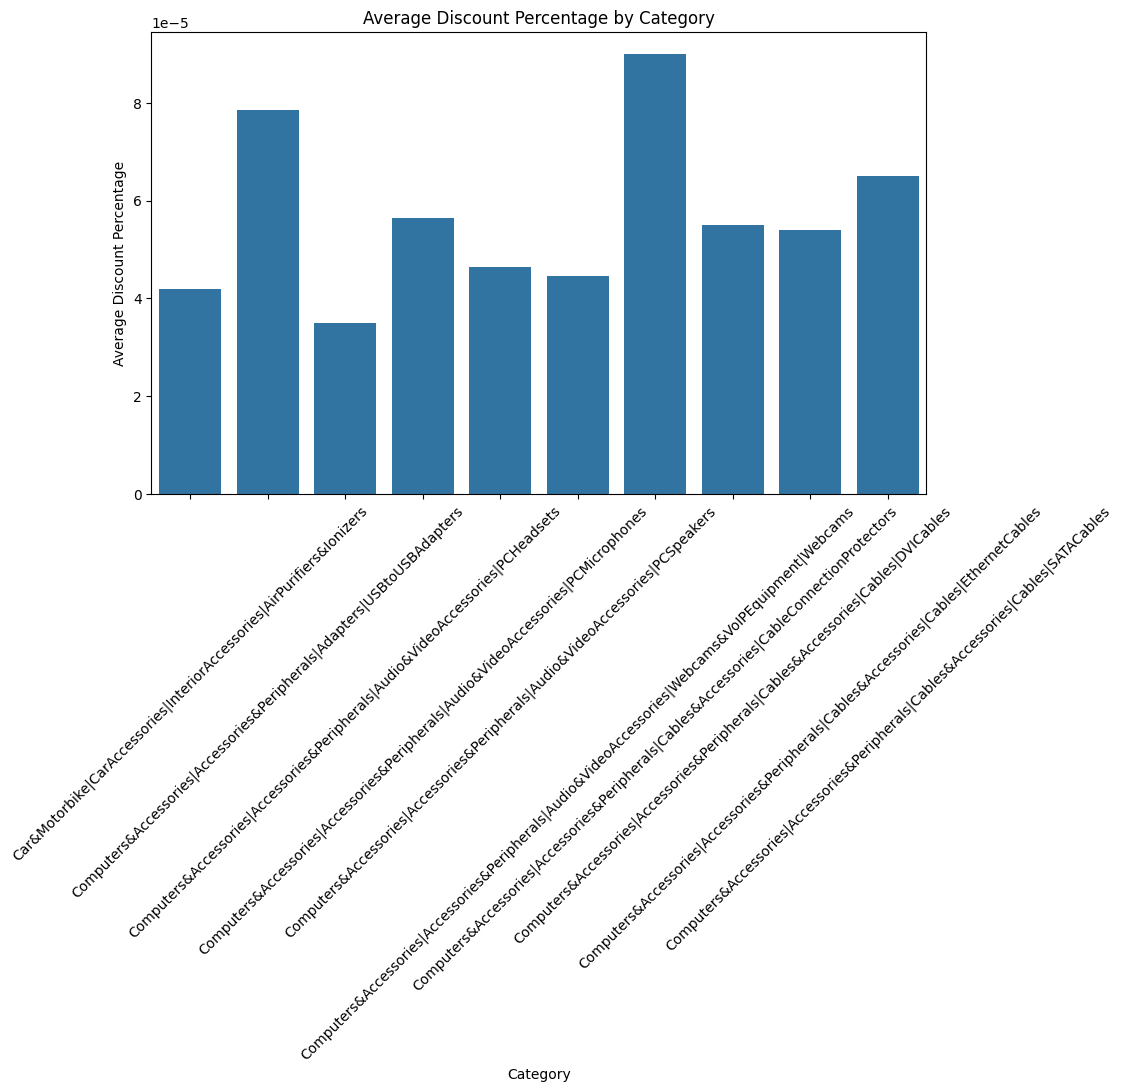

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(x='category',y='discount_percentage',data=avg_discount.head(10))
plt.title('Average Discount Percentage by Category')
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage')
plt.xticks(rotation=45)
plt.show()

5)What are the most popular product names?

In [48]:
product_name = df.groupby('product_name')['rating'].sum().reset_index().sort_values(by='rating',ascending=False).head(10)

In [52]:
product_name

,product_name,rating
384,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",21.0
386,Fire-Boltt Phoenix Smart Watch with Bluetooth ...,17.2
325,Duracell USB Lightning Apple Certified (Mfi) B...,13.5
118,Amazonbasics Nylon Braided Usb-C To Lightning ...,13.2
655,MI Braided USB Type-C Cable for Charging Adapt...,13.2
324,Duracell USB C To Lightning Apple Certified (M...,13.2
84,Amazon Basics USB Type-C to USB-A 2.0 Male Fas...,12.9
1247,boAt A400 USB Type-C to USB-A 2.0 Male Data Ca...,12.9
834,Portronics Konnect L POR-1081 Fast Charging 3A...,12.9
658,MI Usb Type-C Cable Smartphone (Black),12.9


In [54]:
product_name.head(10)

,product_name,rating
384,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",21.0
386,Fire-Boltt Phoenix Smart Watch with Bluetooth ...,17.2
325,Duracell USB Lightning Apple Certified (Mfi) B...,13.5
118,Amazonbasics Nylon Braided Usb-C To Lightning ...,13.2
655,MI Braided USB Type-C Cable for Charging Adapt...,13.2
324,Duracell USB C To Lightning Apple Certified (M...,13.2
84,Amazon Basics USB Type-C to USB-A 2.0 Male Fas...,12.9
1247,boAt A400 USB Type-C to USB-A 2.0 Male Data Ca...,12.9
834,Portronics Konnect L POR-1081 Fast Charging 3A...,12.9
658,MI Usb Type-C Cable Smartphone (Black),12.9


7 What are the most popular product keywords?

In [59]:
# Combine all product names into a single text
all_text = " ".join(df['product_name']).lower()

# Tokenize and remove common stopwords (if needed)
words = re.findall(r'\b[a-zA-Z]+\b', all_text)  # Extract words only
common_words = ['with', 'for', 'and', 'the', 'to']  # Add more stopwords if needed
filtered_words = [word for word in words if word not in common_words]

# Count word frequency
word_counts = Counter(filtered_words)

# Get the most common keywords
popular_keywords = word_counts.most_common(10)  # Top 10 keywords

# Display results
print(popular_keywords)

[('black', 530), ('usb', 417), ('cable', 414), ('c', 289), ('charging', 247), ('type', 243), ('fast', 212), ('in', 178), ('smart', 175), ('white', 170)]


7.What are the most popular product reviews?

In [60]:
product_reviews = df.sort_values(by='rating',ascending=False).head(10)

In [62]:
product_reviews[['category', 'discounted_price']]

,category,discounted_price
324,Computers&Accessories|Accessories&Peripherals|...,NaN
174,Computers&Accessories|Accessories&Peripherals|...,NaN
775,Computers&Accessories|Accessories&Peripherals|...,NaN
1145,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",NaN
1201,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,NaN
1299,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,NaN
249,"Electronics|HomeTheater,TV&Video|Televisions|S...",NaN
1388,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",NaN
1226,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,NaN
459,Electronics|Mobiles&Accessories|MobileAccessor...,NaN


8)What is the correlation between discounted_price and rating?

In [68]:
corr = df['discounted_price'].corr(df['rating'])

In [69]:
corr

nan

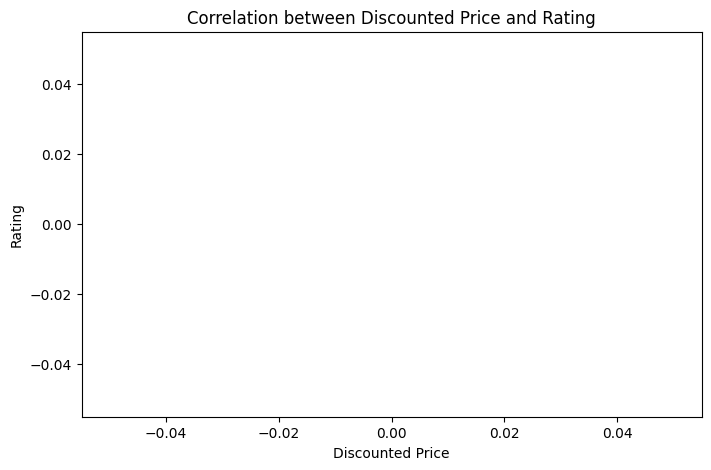

In [67]:
plt.figure(figsize=(8, 5))
sns.regplot(x='discounted_price', y='rating', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Correlation between Discounted Price and Rating")
plt.xlabel("Discounted Price")
plt.ylabel("Rating")
plt.show()

What are the Top 5 categories based on the highest ratings ?

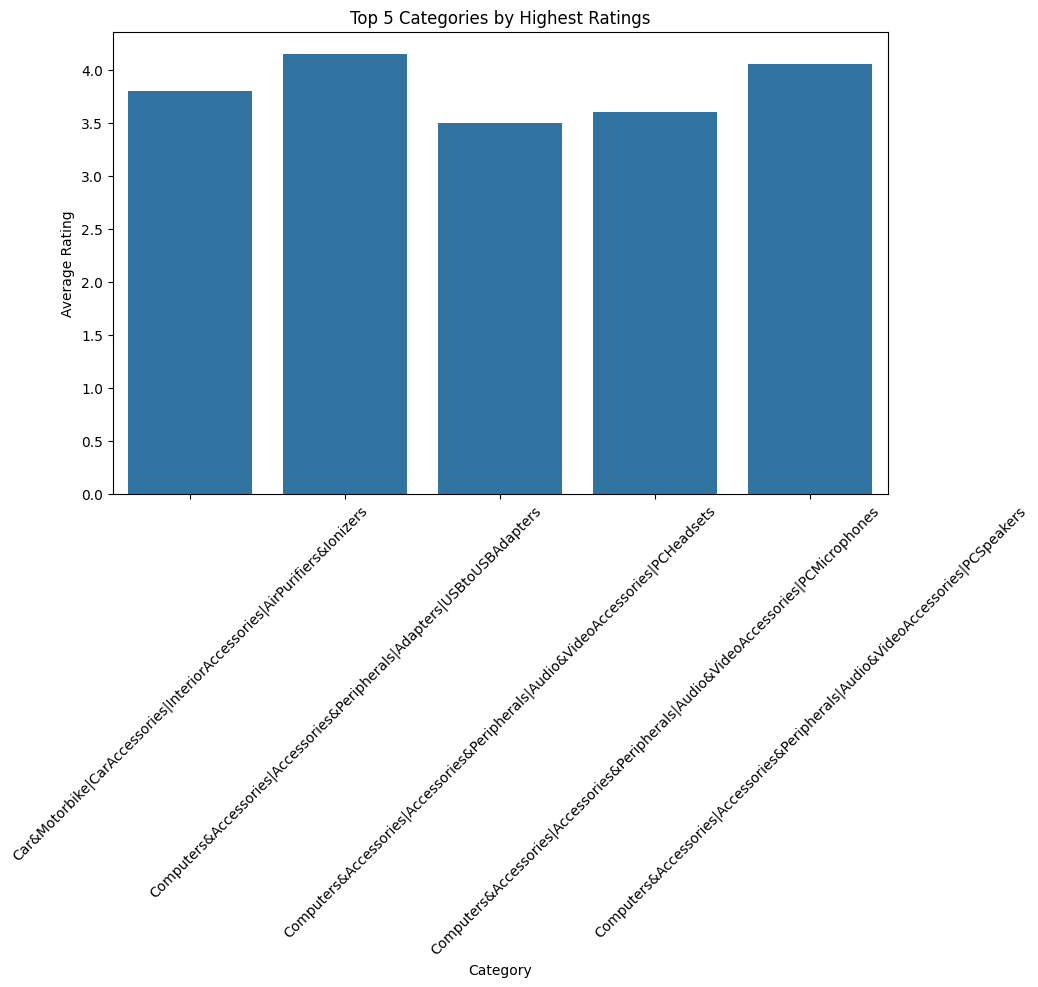

In [71]:

plt.figure(figsize=(10,6))
sns.barplot(x='category',y='rating',data=avg.head(5))
plt.title('Top 5 Categories by Highest Ratings')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

10.Identify any potential areas for improvement or optimization based on the data analysis.

 Pricing Strategy Optimization (discounted_price, actual_price, discount_percentage)
Issue: Some products may have high discount percentages but low sales or ratings.

Optimization:
✅ Compare discounted_price vs. actual_price to check if deep discounts lead to higher ratings or more sales.
✅ Adjust discount percentages based on demand trends instead of offering a flat discount.
✅ Use A/B testing to find the most effective pricing strategies.

2️⃣ Improve Product Quality & Customer Experience (rating, rating_count)
Issue: Low-rated products indicate quality issues or mismatched expectations.

Optimization:
✅ Identify products with high rating_count but low rating to spot common issues.
✅ Improve descriptions in about_product to set accurate customer expectations.
✅ Partner with better suppliers or manufacturers to enhance product quality.

3️⃣ Enhance Customer Reviews & Engagement (review_id, review_title, review_content)
Issue: Products with low engagement in reviews may lack credibility.

Optimization:
✅ Highlight verified customer reviews in product listings.
✅ Analyze review_content to identify frequent complaints or praises.
✅ Encourage customer feedback through follow-up emails or incentives.

4️⃣ Optimize SEO & Product Discoverability (product_name, about_product, img_link, product_link)
Issue: Some products may not be getting enough visibility due to poor keyword optimization.

Optimization:
✅ Extract top-performing keywords from product_name and about_product.
✅ Optimize product_link URLs with high-ranking search terms.
✅ Improve img_link quality to make listings more attractive.

5️⃣ Data-Driven Discounting Strategy (discount_percentage, discounted_price, rating)
Issue: Discounts may not always correlate with higher sales or better ratings.

Optimization:
✅ Compare discount_percentage with rating to check if discounts lead to better feedback.
✅ Adjust pricing dynamically to maximize revenue without over-discounting.

6️⃣ Personalization & Cross-Selling (category, user_id, user_name)
Issue: Customers may not receive personalized recommendations.

Optimization:
✅ Identify popular category trends and suggest related products.
✅ Use user_id and user_name to track past purchases and offer tailored deals.
✅ Implement personalized recommendations based on browsing behavior.

7️⃣ Correlation Analysis for Strategic Insights
(Using discounted_price, rating, category, and rating_count)

What to Check?
✅ Do lower discounted_price products get higher rating?
✅ Are certain categories consistently higher or lower rated?
✅ Do products with high rating_count always have high sales?

